# Machine Learning Text Mining Project - Courses Recomendation, DRAGON-FLY

### Table of Content
<hr>

- [Imports](#1)
- [Loading Data](#2)
- [Data Cleaning](#3)
- [EDA](#4)
- [Data Preprocessing](#5)
- [Sentiment Analysis](#6)
- [Frequency Analysis](#7)

### Introduction To Dataset 
<hr>

**Context**

The set of responses tagged messages that have been collected for research. It contains a set of responses from recruiters as well as students regarding their co-op program in English; 668 messages, tagged acording for personal improvement.


**Content**

The files contain one message per line. Each line is composed by Nine columns:
- (A) Responder
- (B) Terms
- (C) College
- (D) Major
- (E) Course Of Duration
- (F) Class
- (G) Citizenship
- (H) No. Of Co-op
- (I) Responsis

The Excel files contain data of the year 2021, each file has 4 slides:
- (1) Strength 
- (2) Weakness
- (3) Academic Preprations
- (4) College specific Questions


### Imports <a name = "1"></a>
<hr>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from string import punctuation
from wordcloud import WordCloud
from textblob import TextBlob

# -------------------------------------- downloads
# nltk.download('punkt')  # This downloads the tokenizer models
# nltk.download('stopwords')  # This downloads the stopwords list if you are using it
# !pip install textblob
# !python -m textblob.download_corpora

### Loading Data <a name="2"></a>
<hr>

I am using a dataset, downloaded from Drexel Learn provided by Dr. Murugan Anandarajan

In [2]:
data_df = pd.read_excel("AY 2021 BBE EFR Free Response.xlsx", header=1)
data_df_2 = pd.read_excel("AY 2021 BBE EFR Free Response.xlsx", header=1, sheet_name="Weaknesses")
data_df_3 = pd.read_excel("AY 2021 BBE EFR Free Response.xlsx", header=1, sheet_name="Academic Prep")
data_student = pd.read_excel("AY 2021 BBE ES&P Free Response.xlsx", header=1)
data_student_2 = pd.read_excel("AY 2021 BBE ES&P Free Response.xlsx", header=1, sheet_name="Classroom Activities")
data_student_3 = pd.read_excel("AY 2021 BBE ES&P Free Response.xlsx", header=1, sheet_name="Coursework")
data_student_4 = pd.read_excel("AY 2021 BBE ES&P Free Response.xlsx", header=1, sheet_name="College Specific Questions")

# As we can see the data information with not null counts. Hence, most of the data are in Respond Id to response columns; total 9 columns.
# However, first row have unnamed indexing, such as Unnamed: 2, Unnamed: 3 and Unnamed: 4 .... up till Unnamed: 8.
# So, lets drop this unwanted row.

data_strength = data_df
data_weakness = data_df_2
data_academic = data_df_3
data_goals = data_student
data_classroom_activities = data_student_2
data_coursework = data_student_3
data_questions = data_student_4

data_strength.head(5)

,Responder ID,Terms,Coll,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's strengths?
0,3581,Fall/Winter,B,ACCT,5COP,SR,Domestic,Second,Ability to get along with and work well with o...
1,3584,Fall/Winter,B,INT2,5COP,SR,Domestic,First,Will is very good at tackling problems head on...
2,3588,Fall/Winter,B,FIN,5COP,SR,Domestic,Third/Final,"Proactive, focused, detail-oriented, efficient"
3,42,Spring/Summer,B,FIN,5COP,PJ,Domestic,First,She is a very fast learner and is always looki...
4,3600,Fall/Winter,B,MKTG,5COP,SR,Domestic,Third/Final,John wants to learn and improve. I was impress...


In [3]:
data_weakness.shape

(667, 9)

In [4]:
data_strength.shape

(671, 9)

In [5]:
data_academic.shape

(655, 9)

### Data Cleaning <a name="3"></a>
<hr>

In [6]:
# We have a unwanted column ["coll"] because it give the info regarding the college, and the whole column interprets the data from the same college.
# lets check the data and match it with the the total number of rows
duplicate_values = data_strength["Coll"].duplicated().sum()
print("""Duplicate Values in our dataframe["Coll"]: {}""".format(duplicate_values))

# So the total number of duplicates we have in the ["coll"] = to the Index[-1]
# Its better to drop that column
data_strength.drop('Coll', axis=1, inplace=True)

Duplicate Values in our dataframe["Coll"]: 669


In [7]:
data_strength

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's strengths?
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Ability to get along with and work well with o...
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,Will is very good at tackling problems head on...
2,3588,Fall/Winter,FIN,5COP,SR,Domestic,Third/Final,"Proactive, focused, detail-oriented, efficient"
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,She is a very fast learner and is always looki...
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,John wants to learn and improve. I was impress...
...,...,...,...,...,...,...,...,...
666,5773,Fall/Winter,FIN,4COP,SR,Domestic,First,Very hardworking and always ready to learn more.
667,3541,Spring/Summer,ECON,5COP,JR,International,First,Damaris was strong and consistent throughout h...
668,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,Drue is very personable and professional and d...
669,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,Her abilities to analyze and interpret data ar...


In [8]:
data_weakness.shape

(667, 9)

In [9]:
# Lets do the same process for the "Weekness" sheet
duplicate_values_weakness = data_weakness["Coll"].duplicated().sum()
print("""Duplicate Values in our dataframe["Coll"]: {}""".format(duplicate_values_weakness))

# let's drop the unwanted column
data_weakness.drop('Coll', axis=1, inplace=True)

Duplicate Values in our dataframe["Coll"]: 665


In [10]:
data_weakness

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's weaknesses/areas for improvement?
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Kali could be a little more outspoken and dema...
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,Will should continue to work on his data analy...
2,3588,Fall/Winter,FIN,5COP,SR,Domestic,Third/Final,NaN
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,She doesn't communicate through email very wel...
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,John has not yet found his voice. He offers op...
...,...,...,...,...,...,...,...,...
662,5773,Fall/Winter,FIN,4COP,SR,Domestic,First,Xiaoqian has scope to improve her verbal commu...
663,3541,Spring/Summer,ECON,5COP,JR,International,First,I haven’t noticed any deficiencies; I think sh...
664,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,Drue wants to work for a hedge fund. He would ...
665,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,It's crucial to establish an online communicat...


In [11]:
# Lets do the same process for the "academic" sheet
duplicate_values_academic = data_academic["Coll"].duplicated().sum()
print("""Duplicate Values in our dataframe["Coll"]: {}""".format(duplicate_values_weakness))
# let's drop the unwanted column
data_academic.drop('Coll', axis=1, inplace=True)

Duplicate Values in our dataframe["Coll"]: 665


In [12]:
data_academic

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,"What changes, if any, would you suggest for the academic preparation of this student?"
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Kali seemed to be adequately prepared for the ...
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,None - Wil is on the right track to graduate w...
2,3588,Fall/Winter,FIN,5COP,SR,Domestic,Third/Final,NaN
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,None.
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,Maybe more work in projections and setting KPIs.
...,...,...,...,...,...,...,...,...
650,5773,Fall/Winter,FIN,4COP,SR,Domestic,First,NaN
651,3541,Spring/Summer,ECON,5COP,JR,International,First,NaN
652,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,Drue has a strong knowledge of stocks and inve...
653,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,NaN


In [13]:
# Lets do the same process for the sheet
duplicate_values_goals = data_goals["Coll"].duplicated().sum()
print("""Duplicate Values in our dataframe["Coll"]: {}""".format(duplicate_values_goals))
# let's drop the unwanted column
data_goals.drop('Coll', axis=1, inplace=True)

Duplicate Values in our dataframe["Coll"]: 1340


In [14]:
data_goals

,Responder ID,Terms,Major,Conc,Class BOT,Citizenship,Coop #,"Please reflect on how one aspect of this co-op experience relates to a personal, academic, or professional goal that you are pursuing at Drexel. Be specific about both your goal and how one aspect of the co-op relates to this goal. Suggested length: 250-300 words."
0,3572,Fall/Winter,FIN,4COP,SR,International,First/Only,this co-op really helped me gain leadership qu...
1,3574,Fall/Winter,LGST,4COP,SR,Domestic,First/Only,I really wanted to build my network and begin ...
2,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Although I do not see myself working in financ...
3,3583,Fall/Winter,FIN,5COP,JR,Domestic,Second,At my previous co-op I was told I need to spea...
4,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,I never expected to have a job in forensic acc...
...,...,...,...,...,...,...,...,...
1337,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,I eventually would like to work at a fund as a...
1338,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,It allowed me to look more into the subject of...
1339,3555,Spring,FIN,5COP,JR,Domestic,First,NaN
1340,3563,Spring/Summer,ECON,5COP,JR,Domestic,First,This is a great question because I feel like m...


In [15]:
# Lets do the same process for the  sheet
duplicate_values_classroom_activities = data_classroom_activities["Coll"].duplicated().sum()
print("""Duplicate Values in our dataframe["Coll"]: {}""".format(duplicate_values_classroom_activities))
# let's drop the unwanted column
data_classroom_activities.drop('Coll', axis=1, inplace=True)

Duplicate Values in our dataframe["Coll"]: 1339


In [16]:
data_classroom_activities

,Responder ID,Terms,Major,Conc,Class BOT,Citizenship,Coop #,Did your classroom activities prepare you for co-op?,Do you have any suggestions on how to improve your classroom activities to prepare you for your career?,"How did your classroom activities prepare you for co-op? If they didn’t, how were you prepared for co-op?"
0,3572,Fall/Winter,FIN,4COP,SR,International,First/Only,Y,"yes, they should be interactive so that everyo...",they prepared us as we have a lot of interacti...
1,3574,Fall/Winter,LGST,4COP,SR,Domestic,First/Only,Y,There should be more emphasis on computer prog...,"They made me a confident writer and orator, be..."
2,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Y,I think being back in person will be good for ...,Team projects help in the co-op environment. A...
3,3583,Fall/Winter,FIN,5COP,JR,Domestic,Second,Y,"More team based problem sets, like case studie...",In MIS we worked on a lot of Excel sheets with...
4,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,N,I think a good practice would be to have a cou...,While the material I learned in class did help...
...,...,...,...,...,...,...,...,...,...,...
1336,3541,Spring/Summer,ECON,5COP,JR,International,First,Y,Not at the moment,Interactions with students and teachers allowe...
1337,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,N,Learning how to model companies.,Macroeconomics was the most helpful class I to...
1338,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,Y,no,Communication and formal writing
1339,3563,Spring/Summer,ECON,5COP,JR,Domestic,First,Y,No,They prepared me in the sense of problem-solvi...


In [17]:
# Lets do the same process for the sheet
duplicate_values_coursework = data_coursework["Coll"].duplicated().sum()
print("""Duplicate Values in our dataframe["Coll"]: {}""".format(duplicate_values_coursework))
# let's drop the unwanted column
data_coursework.drop('Coll', axis=1, inplace=True)

Duplicate Values in our dataframe["Coll"]: 1335


In [18]:
data_coursework

,Responder ID,Terms,Major,Conc,Class BOT,Citizenship,Coop #,What coursework did you apply most during your co-op?
0,3572,Fall/Winter,FIN,4COP,SR,International,First/Only,communication
1,3574,Fall/Winter,LGST,4COP,SR,Domestic,First/Only,All of my business courses at LeBow from Commu...
2,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,I would say my finance class and statistics cl...
3,3583,Fall/Winter,FIN,5COP,JR,Domestic,Second,MIS200 Class and Marketing
4,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,"Introduction to Finance, Business Communicatio..."
...,...,...,...,...,...,...,...,...
1332,3541,Spring/Summer,ECON,5COP,JR,International,First,I mostly applied Statistics since there was in...
1333,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,Time Management
1334,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,Business communications and business law
1335,3563,Spring/Summer,ECON,5COP,JR,Domestic,First,"ECON 270, CS 171, and CS 150"


In [19]:
# Lets do the same process for the sheet
duplicate_values_questions = data_questions["Coll"].duplicated().sum()
print("""Duplicate Values in our dataframe["Coll"]: {}""".format(duplicate_values_questions))
# let's drop the unwanted column
data_questions.drop('Coll', axis=1, inplace=True)

Duplicate Values in our dataframe["Coll"]: 1339


In [20]:
data_questions

,Responder ID,Terms,Major,Conc,Class BOT,Citizenship,Coop #,"In returning to classes, what do you want to learn/focus on?",What are the most important skills you used on co-op?,What skills do you need to develop or improve to better prepare you for your next position?,What would have made this job more interesting to you?
0,3572,Fall/Winter,FIN,4COP,SR,International,First/Only,"I have graduated, thus I will use and hone the...",communication,how to convey my thoughts more effectively,if there would have been little diversificatio...
1,3574,Fall/Winter,LGST,4COP,SR,Domestic,First/Only,More hard skills like Adobe Suite and graphic ...,"Organization for one, especially being part of...",Networking for sure. It's one thing to meet a ...,"Nothing really, it was everything I could've a..."
2,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,I am most excited to return to class and start...,I use excel every day at my co-op position. My...,I need to become more familiar with accounting...,I think the job would have been more interesti...
3,3583,Fall/Winter,FIN,5COP,JR,Domestic,Second,I want to be a more engaged student,I would say communication skills. While workin...,Better project management. I feel as if a lot ...,If I was able to interact with more people who...
4,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,I would like to continue focusing on corporate...,Interpersonal communication - while it is a so...,"Microsoft Excel - while I am familiar, it was ...",This job definitely benefits from being in-per...
...,...,...,...,...,...,...,...,...,...,...,...
1336,3541,Spring/Summer,ECON,5COP,JR,International,First,I want to focus on my minor which is Data Scie...,Problem solving_x000D_\nCritical thinking_x000...,I would like to develop my Excel skills since ...,Using raw data may have been more appealing si...
1337,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,I want to learn more about the emotional side ...,Assessing a problem from all different perspec...,"Excel, Excel, Excel. Super powerful tool. I fe...",More work.
1338,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,Law,Communication,time management,More organized and individual designed tasks
1339,3563,Spring/Summer,ECON,5COP,JR,Domestic,First,I want to further improve my programming skill...,I would say communication and adaptability. St...,I need to improve my programming skills to mai...,"First, the job itself was already interesting...."


In [21]:
#checking null values in the dataframne

data_strength.isnull().sum()

# we do have some null values in the last column, let's drop the row with the nan values
data_strength.dropna(inplace=True)
data_strength

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's strengths?
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Ability to get along with and work well with o...
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,Will is very good at tackling problems head on...
2,3588,Fall/Winter,FIN,5COP,SR,Domestic,Third/Final,"Proactive, focused, detail-oriented, efficient"
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,She is a very fast learner and is always looki...
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,John wants to learn and improve. I was impress...
...,...,...,...,...,...,...,...,...
666,5773,Fall/Winter,FIN,4COP,SR,Domestic,First,Very hardworking and always ready to learn more.
667,3541,Spring/Summer,ECON,5COP,JR,International,First,Damaris was strong and consistent throughout h...
668,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,Drue is very personable and professional and d...
669,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,Her abilities to analyze and interpret data ar...


In [22]:
#checking null values in the dataframne
data_weakness.isnull().sum()

Responder ID                                                 0
Terms                                                        0
Major                                                        0
Conc 1                                                       0
Class BOT                                                    0
Citizenship                                                  0
Coop #                                                       0
What are the student's weaknesses/areas for improvement?    30
dtype: int64

In [23]:
# we do have some null values in the last column, let's drop the row with the nan values
data_weakness.dropna(inplace=True)
data_weakness

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's weaknesses/areas for improvement?
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Kali could be a little more outspoken and dema...
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,Will should continue to work on his data analy...
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,She doesn't communicate through email very wel...
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,John has not yet found his voice. He offers op...
5,3608,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,Prioritizing projects and completing them with...
...,...,...,...,...,...,...,...,...
662,5773,Fall/Winter,FIN,4COP,SR,Domestic,First,Xiaoqian has scope to improve her verbal commu...
663,3541,Spring/Summer,ECON,5COP,JR,International,First,I haven’t noticed any deficiencies; I think sh...
664,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,Drue wants to work for a hedge fund. He would ...
665,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,It's crucial to establish an online communicat...


In [24]:
#checking null values in the dataframne

data_academic.isnull().sum()

Responder ID                                                                               0
Terms                                                                                      0
Major                                                                                      0
Conc 1                                                                                     0
Class BOT                                                                                  0
Citizenship                                                                                0
Coop #                                                                                     0
What changes, if any, would you suggest for the academic preparation of this student?    225
dtype: int64

In [25]:
# we do have some null values in the last column, let's drop the row with the nan values
data_academic.dropna(inplace=True)
data_academic

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,"What changes, if any, would you suggest for the academic preparation of this student?"
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Kali seemed to be adequately prepared for the ...
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,None - Wil is on the right track to graduate w...
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,None.
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,Maybe more work in projections and setting KPIs.
6,56,Spring/Summer,SPBS,5COP,PJ,Domestic,First,This position is hospitality oriented and food...
...,...,...,...,...,...,...,...,...
644,1737,Fall/Winter,MKTG,4COP,JR,Domestic,First/Only,Academic training seemed adequate. Perhaps mor...
645,3502,Spring/Summer,MKTG,5COP,JR,Domestic,First,Include more information on digital marketing ...
647,3506,Spring/Summer,ACCT,4COP,SR,Domestic,First/Only,Tung had no prior accounting work experience o...
649,3510,Spring/Summer,ACCT,4COP,SR,Domestic,First/Only,None/not applicable


In [26]:
data_goals.isnull().sum()

Responder ID                                                                                                                                                                                                                                                                0
Terms                                                                                                                                                                                                                                                                       0
Major                                                                                                                                                                                                                                                                       0
Conc                                                                                                                                                                                          

In [27]:
# we do have some null values in the last column, let's drop the row with the nan values
data_goals.dropna(inplace=True)
data_academic

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,"What changes, if any, would you suggest for the academic preparation of this student?"
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Kali seemed to be adequately prepared for the ...
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,None - Wil is on the right track to graduate w...
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,None.
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,Maybe more work in projections and setting KPIs.
6,56,Spring/Summer,SPBS,5COP,PJ,Domestic,First,This position is hospitality oriented and food...
...,...,...,...,...,...,...,...,...
644,1737,Fall/Winter,MKTG,4COP,JR,Domestic,First/Only,Academic training seemed adequate. Perhaps mor...
645,3502,Spring/Summer,MKTG,5COP,JR,Domestic,First,Include more information on digital marketing ...
647,3506,Spring/Summer,ACCT,4COP,SR,Domestic,First/Only,Tung had no prior accounting work experience o...
649,3510,Spring/Summer,ACCT,4COP,SR,Domestic,First/Only,None/not applicable


In [28]:
# Checking if the data has bullet points in it 
bullet_pattern = r'^[•*\-]\s*'

bullets = data_strength.apply(lambda row: row.astype(str).str.contains(bullet_pattern)).any().any()

if bullets:
    print("The DataFrame contains bullet points.")
else:
    print("No bullet points found in the DataFrame.")

The DataFrame contains bullet points.


In [29]:
# we do have bullet points, let's remove it 
data_strength = data_strength.replace(bullet_pattern, '', regex=True)
print(data_strength)

     Responder ID          Terms Major Conc 1 Class BOT    Citizenship  \
0            3581    Fall/Winter  ACCT   5COP        SR       Domestic   
1            3584    Fall/Winter  INT2   5COP        SR       Domestic   
2            3588    Fall/Winter   FIN   5COP        SR       Domestic   
3              42  Spring/Summer   FIN   5COP        PJ       Domestic   
4            3600    Fall/Winter  MKTG   5COP        SR       Domestic   
..            ...            ...   ...    ...       ...            ...   
666          5773    Fall/Winter   FIN   4COP        SR       Domestic   
667          3541  Spring/Summer  ECON   5COP        JR  International   
668          3548  Spring/Summer   FIN   5COP        SO       Domestic   
669          3550  Spring/Summer  LGST   5COP        JR       Domestic   
670          3563  Spring/Summer  ECON   5COP        JR       Domestic   

          Coop #                  What are the student's strengths?  
0         Second  Ability to get along wi

In [30]:
# removing bullets from sheet 2
bullets_weakness = data_weakness.apply(lambda row: row.astype(str).str.contains(bullet_pattern)).any().any()

if bullets_weakness:
    print("The DataFrame contains bullet points.")
else:
    print("No bullet points found in the DataFrame.")

The DataFrame contains bullet points.


In [31]:
data_weakness = data_weakness.replace(bullet_pattern, '', regex=True)
print(data_weakness)

     Responder ID          Terms Major Conc 1 Class BOT    Citizenship  \
0            3581    Fall/Winter  ACCT   5COP        SR       Domestic   
1            3584    Fall/Winter  INT2   5COP        SR       Domestic   
3              42  Spring/Summer   FIN   5COP        PJ       Domestic   
4            3600    Fall/Winter  MKTG   5COP        SR       Domestic   
5            3608    Fall/Winter  MKTG   5COP        SR       Domestic   
..            ...            ...   ...    ...       ...            ...   
662          5773    Fall/Winter   FIN   4COP        SR       Domestic   
663          3541  Spring/Summer  ECON   5COP        JR  International   
664          3548  Spring/Summer   FIN   5COP        SO       Domestic   
665          3550  Spring/Summer  LGST   5COP        JR       Domestic   
666          3563  Spring/Summer  ECON   5COP        JR       Domestic   

          Coop # What are the student's weaknesses/areas for improvement?  
0         Second  Kali could be a l

In [32]:
# Checking if the data has bullet points in it 
bullet_pattern = r'^[•*\-]\s*'

bullets = data_academic.apply(lambda row: row.astype(str).str.contains(bullet_pattern)).any().any()

if bullets:
    print("The DataFrame contains bullet points.")
else:
    print("No bullet points found in the DataFrame.")

data_academic = data_academic.replace(bullet_pattern, '', regex=True)
print(data_academic)

The DataFrame contains bullet points.
     Responder ID          Terms Major Conc 1 Class BOT Citizenship  \
0            3581    Fall/Winter  ACCT   5COP        SR    Domestic   
1            3584    Fall/Winter  INT2   5COP        SR    Domestic   
3              42  Spring/Summer   FIN   5COP        PJ    Domestic   
4            3600    Fall/Winter  MKTG   5COP        SR    Domestic   
6              56  Spring/Summer  SPBS   5COP        PJ    Domestic   
..            ...            ...   ...    ...       ...         ...   
644          1737    Fall/Winter  MKTG   4COP        JR    Domestic   
645          3502  Spring/Summer  MKTG   5COP        JR    Domestic   
647          3506  Spring/Summer  ACCT   4COP        SR    Domestic   
649          3510  Spring/Summer  ACCT   4COP        SR    Domestic   
652          3548  Spring/Summer   FIN   5COP        SO    Domestic   

          Coop #  \
0         Second   
1          First   
3          First   
4    Third/Final   
6        

In [33]:
# removing link from data frame
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

no_links = data_strength[~data_strength.apply(lambda row: row.astype(str).str.contains(url_pattern)).any(axis=1)]
print(no_links)

     Responder ID          Terms Major Conc 1 Class BOT    Citizenship  \
0            3581    Fall/Winter  ACCT   5COP        SR       Domestic   
1            3584    Fall/Winter  INT2   5COP        SR       Domestic   
2            3588    Fall/Winter   FIN   5COP        SR       Domestic   
3              42  Spring/Summer   FIN   5COP        PJ       Domestic   
4            3600    Fall/Winter  MKTG   5COP        SR       Domestic   
..            ...            ...   ...    ...       ...            ...   
666          5773    Fall/Winter   FIN   4COP        SR       Domestic   
667          3541  Spring/Summer  ECON   5COP        JR  International   
668          3548  Spring/Summer   FIN   5COP        SO       Domestic   
669          3550  Spring/Summer  LGST   5COP        JR       Domestic   
670          3563  Spring/Summer  ECON   5COP        JR       Domestic   

          Coop #                  What are the student's strengths?  
0         Second  Ability to get along wi

In [34]:
# removing link from data frame; sheet2
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

no_links = data_weakness[~data_weakness.apply(lambda row: row.astype(str).str.contains(url_pattern)).any(axis=1)]
print(no_links)

     Responder ID          Terms Major Conc 1 Class BOT    Citizenship  \
0            3581    Fall/Winter  ACCT   5COP        SR       Domestic   
1            3584    Fall/Winter  INT2   5COP        SR       Domestic   
3              42  Spring/Summer   FIN   5COP        PJ       Domestic   
4            3600    Fall/Winter  MKTG   5COP        SR       Domestic   
5            3608    Fall/Winter  MKTG   5COP        SR       Domestic   
..            ...            ...   ...    ...       ...            ...   
662          5773    Fall/Winter   FIN   4COP        SR       Domestic   
663          3541  Spring/Summer  ECON   5COP        JR  International   
664          3548  Spring/Summer   FIN   5COP        SO       Domestic   
665          3550  Spring/Summer  LGST   5COP        JR       Domestic   
666          3563  Spring/Summer  ECON   5COP        JR       Domestic   

          Coop # What are the student's weaknesses/areas for improvement?  
0         Second  Kali could be a l

In [35]:
# removing link from data frame from sheet 3
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'

no_links = data_academic[~data_academic.apply(lambda row: row.astype(str).str.contains(url_pattern)).any(axis=1)]
print(no_links)

     Responder ID          Terms Major Conc 1 Class BOT Citizenship  \
0            3581    Fall/Winter  ACCT   5COP        SR    Domestic   
1            3584    Fall/Winter  INT2   5COP        SR    Domestic   
3              42  Spring/Summer   FIN   5COP        PJ    Domestic   
4            3600    Fall/Winter  MKTG   5COP        SR    Domestic   
6              56  Spring/Summer  SPBS   5COP        PJ    Domestic   
..            ...            ...   ...    ...       ...         ...   
644          1737    Fall/Winter  MKTG   4COP        JR    Domestic   
645          3502  Spring/Summer  MKTG   5COP        JR    Domestic   
647          3506  Spring/Summer  ACCT   4COP        SR    Domestic   
649          3510  Spring/Summer  ACCT   4COP        SR    Domestic   
652          3548  Spring/Summer   FIN   5COP        SO    Domestic   

          Coop #  \
0         Second   
1          First   
3          First   
4    Third/Final   
6          First   
..           ...   
644   F

### EDA <a name="4"></a>
<hr>

In [36]:
data_strength["Major"].value_counts()

Major
FIN     198
MKTG    133
ACCT     43
SPBS     41
GBUS     41
MIS      39
BAE      32
ECON     23
BSAN     22
OSCM     19
LGST     18
INT1     15
B000     10
REMD      9
SMT       7
ESPB      3
INT2      2
BAEC      2
EB        2
BEBO      2
OMGT      2
TIMS      1
Name: count, dtype: int64

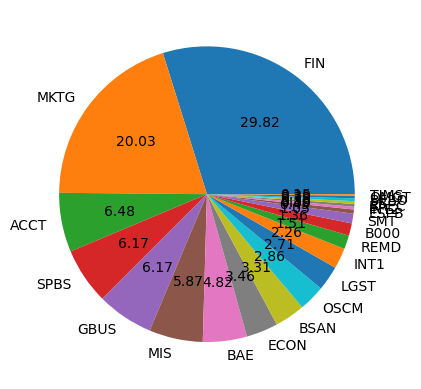

In [37]:
# Plotting the pie chat; student's major 
plt.pie(data_strength['Major'].value_counts(),
         labels=["FIN",
                 "MKTG",
                 "ACCT",
                 "SPBS",
                 "GBUS",
                 "MIS",
                 "BAE",
                 "ECON",
                 "BSAN",
                 "OSCM",
                 "LGST",
                 "INT1",
                 "REMD",
                 "B000",
                 "SMT",
                 "ESPB",
                 "INT2",
                 "BAEC",
                 "EB",
                 "BEBO",
                 "OMGT",
                 "TIMS"],
        autopct="%0.2f");

### Data Preprocessing <a name="5"></a>
<hr>

- Lower case
- Tokenization
- Removing Special characters
- Removing stop words and punctuations
- stemming

In [38]:
# I am creating function to do all the above work consequitively 

def Text_transformation(text):
    text = word_tokenize(str(text).lower())
    text = list(x for x in text if x.isalnum())
    text = list(x for x in text if x not in stopwords.words("english") and x not in punctuation)
    final_text = []
    porter = PorterStemmer()
    for i in text:
        final_text.append(porter.stem(i))
    return " ".join(final_text)

In [39]:
Text_transformation("VASU PATEL; A data scientist enabler-if I may say so-curiosity-driven, fond of connecting the dots: ideas from different disciplines, people from different teams, or applications from different industries.")

'vasu patel data scientist may say fond connect dot idea differ disciplin peopl differ team applic differ industri'

In [40]:
# Creating new column specifically for transformed text
data_strength["Text_transformation"] = data_strength["What are the student's strengths?"].apply(Text_transformation)

In [41]:
data_strength.head(14)

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's strengths?,Text_transformation
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Ability to get along with and work well with o...,abil get along work well other regardless fami...
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,Will is very good at tackling problems head on...,good tackl problem head even though still remo...
2,3588,Fall/Winter,FIN,5COP,SR,Domestic,Third/Final,"Proactive, focused, detail-oriented, efficient",proactiv focus effici
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,She is a very fast learner and is always looki...,fast learner alway look new project work
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,John wants to learn and improve. I was impress...,john want learn improv impress skill level qua...
5,3608,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,Tracking his projects/process of these project...,track project also easi person talk connect
6,56,Spring/Summer,SPBS,5COP,PJ,Domestic,First,Sean's strengths included being flexible to ch...,sean strength includ flexibl chang versatil wi...
7,3613,Fall/Winter,FIN,5COP,SR,Domestic,Third/Final,Organized _x000D_\nProfessional _x000D_\nDetai...,organ profession gain understand valuat concep...
8,3617,Fall/Winter,GBUS,5COP,SR,International,Third/Final,PK is a dedicated worker and is eager to learn...,pk dedic worker eager learn new thing take ass...
9,3620,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,Over the last 6 months have seen a tremendous ...,last 6 month seen tremend growth parker term s...


In [42]:
# Visulizing most words used in Target column

WC = WordCloud(width=700,
              height=700,
              min_font_size=10,
              background_color="white")

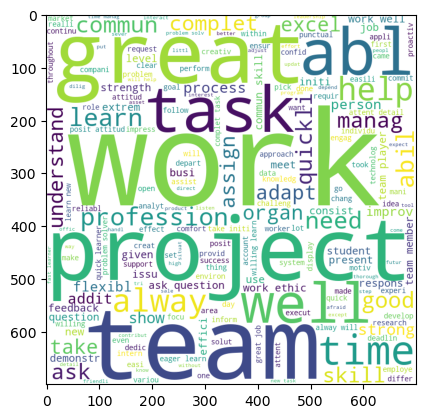

In [43]:
# Strength wordcloud
spam_wc = WC.generate(data_strength["Text_transformation"].str.cat(sep=" "))
plt.imshow(spam_wc)

In [44]:
data_weakness

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's weaknesses/areas for improvement?
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Kali could be a little more outspoken and dema...
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,Will should continue to work on his data analy...
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,She doesn't communicate through email very wel...
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,John has not yet found his voice. He offers op...
5,3608,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,Prioritizing projects and completing them with...
...,...,...,...,...,...,...,...,...
662,5773,Fall/Winter,FIN,4COP,SR,Domestic,First,Xiaoqian has scope to improve her verbal commu...
663,3541,Spring/Summer,ECON,5COP,JR,International,First,I haven’t noticed any deficiencies; I think sh...
664,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,Drue wants to work for a hedge fund. He would ...
665,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,It's crucial to establish an online communicat...


In [45]:
# Applying text transformation on weakness sheet
# Creating new column specifically for transformed text
data_weakness["Text_transformation"] = data_weakness["What are the student's weaknesses/areas for improvement?"].apply(Text_transformation)

In [46]:
data_weakness

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's weaknesses/areas for improvement?,Text_transformation
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Kali could be a little more outspoken and dema...,kali could littl outspoken demand respons inst...
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,Will should continue to work on his data analy...,continu work data analysi investig skill also ...
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,She doesn't communicate through email very wel...,commun email well especi remot day
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,John has not yet found his voice. He offers op...,john yet found voic offer opinion ask need dev...
5,3608,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,Prioritizing projects and completing them with...,priorit project complet given timelin ask help...
...,...,...,...,...,...,...,...,...,...
662,5773,Fall/Winter,FIN,4COP,SR,Domestic,First,Xiaoqian has scope to improve her verbal commu...,xiaoqian scope improv verbal commun display co...
663,3541,Spring/Summer,ECON,5COP,JR,International,First,I haven’t noticed any deficiencies; I think sh...,notic defici think need exposur keep get better
664,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,Drue wants to work for a hedge fund. He would ...,drue want work hedg fund would benefit take cl...
665,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,It's crucial to establish an online communicat...,crucial establish onlin commun flow especi rem...


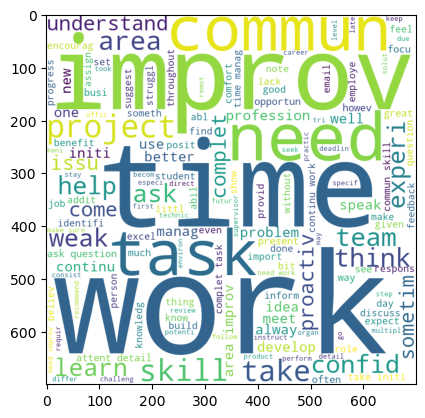

In [47]:
# weakness wordcloud
spam_wc_2 = WC.generate(data_weakness["Text_transformation"].str.cat(sep=" "))
plt.imshow(spam_wc_2)

In [48]:
data_academic

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,"What changes, if any, would you suggest for the academic preparation of this student?"
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Kali seemed to be adequately prepared for the ...
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,None - Wil is on the right track to graduate w...
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,None.
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,Maybe more work in projections and setting KPIs.
6,56,Spring/Summer,SPBS,5COP,PJ,Domestic,First,This position is hospitality oriented and food...
...,...,...,...,...,...,...,...,...
644,1737,Fall/Winter,MKTG,4COP,JR,Domestic,First/Only,Academic training seemed adequate. Perhaps mor...
645,3502,Spring/Summer,MKTG,5COP,JR,Domestic,First,Include more information on digital marketing ...
647,3506,Spring/Summer,ACCT,4COP,SR,Domestic,First/Only,Tung had no prior accounting work experience o...
649,3510,Spring/Summer,ACCT,4COP,SR,Domestic,First/Only,None/not applicable


In [49]:
# Applying text transformation on weakness sheet
# Creating new column specifically for transformed text
data_academic["Text_transformation"] = data_academic["What changes, if any, would you suggest for the academic preparation of this student?"].apply(Text_transformation)

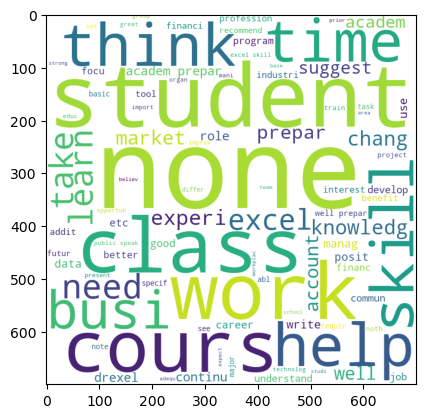

In [50]:
# academic wordcloud
spam_wc_3 = WC.generate(data_academic["Text_transformation"].str.cat(sep=" "))
plt.imshow(spam_wc_3)

### Sentiment Analysis <a name="6"></a>
<hr>

In [51]:
# Perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    analysis = TextBlob(text)
    # Classify the polarity of the text (-1 to 1: negative to positive)
    polarity = analysis.sentiment.polarity
    # Classify the subjectivity of the text (0 to 1: objective to subjective)
    subjectivity = analysis.sentiment.subjectivity
    return polarity, subjectivity

In [52]:
# Apply sentiment analysis to the 'text_column' and create new columns for polarity and subjectivity
data_strength['Sentiment Analysis'] = data_strength['Text_transformation'].apply(analyze_sentiment)
data_strength['LFS'], data_strength['RHS'] = zip(*data_strength['Text_transformation'].apply(analyze_sentiment))

In [53]:
data_strength

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's strengths?,Text_transformation,Sentiment Analysis,LFS,RHS
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Ability to get along with and work well with o...,abil get along work well other regardless fami...,"(0.11666666666666665, 0.425)",0.116667,0.425000
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,Will is very good at tackling problems head on...,good tackl problem head even though still remo...,"(0.7749999999999999, 0.5250000000000001)",0.775000,0.525000
2,3588,Fall/Winter,FIN,5COP,SR,Domestic,Third/Final,"Proactive, focused, detail-oriented, efficient",proactiv focus effici,"(0.0, 0.0)",0.000000,0.000000
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,She is a very fast learner and is always looki...,fast learner alway look new project work,"(0.16818181818181818, 0.5272727272727272)",0.168182,0.527273
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,John wants to learn and improve. I was impress...,john want learn improv impress skill level qua...,"(0.0, 0.0)",0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
666,5773,Fall/Winter,FIN,4COP,SR,Domestic,First,Very hardworking and always ready to learn more.,hardwork alway readi learn,"(0.0, 0.0)",0.000000,0.000000
667,3541,Spring/Summer,ECON,5COP,JR,International,First,Damaris was strong and consistent throughout h...,damari strong consist throughout entir time ds...,"(0.43333333333333335, 0.7333333333333334)",0.433333,0.733333
668,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,Drue is very personable and professional and d...,drue person profession great job commun equal ...,"(0.5, 0.5333333333333333)",0.500000,0.533333
669,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,Her abilities to analyze and interpret data ar...,abil analyz interpret data among strength depe...,"(0.0, 0.0)",0.000000,0.000000


In [54]:
# Creating new column in data_weakness specifically for sentiment analysis
data_weakness["Sentiment Analysis"] = data_weakness["Text_transformation"].apply(Text_transformation)
data_weakness['Sentiment Analysis'] = data_weakness['Text_transformation'].apply(analyze_sentiment)

In [55]:
data_weakness

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's weaknesses/areas for improvement?,Text_transformation,Sentiment Analysis
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Kali could be a little more outspoken and dema...,kali could littl outspoken demand respons inst...,"(0.4, 0.8)"
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,Will should continue to work on his data analy...,continu work data analysi investig skill also ...,"(0.0, 0.0)"
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,She doesn't communicate through email very wel...,commun email well especi remot day,"(0.0, 0.0)"
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,John has not yet found his voice. He offers op...,john yet found voic offer opinion ask need dev...,"(0.5, 0.8888888888888888)"
5,3608,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,Prioritizing projects and completing them with...,priorit project complet given timelin ask help...,"(0.0, 0.0)"
...,...,...,...,...,...,...,...,...,...,...
662,5773,Fall/Winter,FIN,4COP,SR,Domestic,First,Xiaoqian has scope to improve her verbal commu...,xiaoqian scope improv verbal commun display co...,"(0.0, 0.0)"
663,3541,Spring/Summer,ECON,5COP,JR,International,First,I haven’t noticed any deficiencies; I think sh...,notic defici think need exposur keep get better,"(0.5, 0.5)"
664,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,Drue wants to work for a hedge fund. He would ...,drue want work hedg fund would benefit take cl...,"(0.0, 0.0)"
665,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,It's crucial to establish an online communicat...,crucial establish onlin commun flow especi rem...,"(0.0, 1.0)"


In [56]:
data_weakness['LFS'], data_weakness['RHS'] = zip(*data_weakness['Text_transformation'].apply(analyze_sentiment))

In [57]:
data_weakness

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,What are the student's weaknesses/areas for improvement?,Text_transformation,Sentiment Analysis,LFS,RHS
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Kali could be a little more outspoken and dema...,kali could littl outspoken demand respons inst...,"(0.4, 0.8)",0.4,0.800000
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,Will should continue to work on his data analy...,continu work data analysi investig skill also ...,"(0.0, 0.0)",0.0,0.000000
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,She doesn't communicate through email very wel...,commun email well especi remot day,"(0.0, 0.0)",0.0,0.000000
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,John has not yet found his voice. He offers op...,john yet found voic offer opinion ask need dev...,"(0.5, 0.8888888888888888)",0.5,0.888889
5,3608,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,Prioritizing projects and completing them with...,priorit project complet given timelin ask help...,"(0.0, 0.0)",0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
662,5773,Fall/Winter,FIN,4COP,SR,Domestic,First,Xiaoqian has scope to improve her verbal commu...,xiaoqian scope improv verbal commun display co...,"(0.0, 0.0)",0.0,0.000000
663,3541,Spring/Summer,ECON,5COP,JR,International,First,I haven’t noticed any deficiencies; I think sh...,notic defici think need exposur keep get better,"(0.5, 0.5)",0.5,0.500000
664,3548,Spring/Summer,FIN,5COP,SO,Domestic,First,Drue wants to work for a hedge fund. He would ...,drue want work hedg fund would benefit take cl...,"(0.0, 0.0)",0.0,0.000000
665,3550,Spring/Summer,LGST,5COP,JR,Domestic,First,It's crucial to establish an online communicat...,crucial establish onlin commun flow especi rem...,"(0.0, 1.0)",0.0,1.000000


In [58]:
# Apply sentiment analysis to the 'text_column' and create new columns for polarity and subjectivity
data_academic['Sentiment Analysis'] = data_academic['Text_transformation'].apply(analyze_sentiment)

In [59]:
data_academic['LFS'], data_academic['RHS'] = zip(*data_academic['Text_transformation'].apply(analyze_sentiment))

In [60]:
data_academic

,Responder ID,Terms,Major,Conc 1,Class BOT,Citizenship,Coop #,"What changes, if any, would you suggest for the academic preparation of this student?",Text_transformation,Sentiment Analysis,LFS,RHS
0,3581,Fall/Winter,ACCT,5COP,SR,Domestic,Second,Kali seemed to be adequately prepared for the ...,kali seem adequ prepar demand posit gener stan...,"(0.25, 0.5472222222222223)",0.250000,0.547222
1,3584,Fall/Winter,INT2,5COP,SR,Domestic,First,None - Wil is on the right track to graduate w...,none wil right track graduat great educ base s...,"(0.09523809523809527, 0.7619047619047619)",0.095238,0.761905
3,42,Spring/Summer,FIN,5COP,PJ,Domestic,First,None.,none,"(0.0, 0.0)",0.000000,0.000000
4,3600,Fall/Winter,MKTG,5COP,SR,Domestic,Third/Final,Maybe more work in projections and setting KPIs.,mayb work project set kpi,"(0.0, 0.0)",0.000000,0.000000
6,56,Spring/Summer,SPBS,5COP,PJ,Domestic,First,This position is hospitality oriented and food...,posit hospit orient food beverag center think ...,"(-0.13333333333333333, 0.5333333333333333)",-0.133333,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...
644,1737,Fall/Winter,MKTG,4COP,JR,Domestic,First/Only,Academic training seemed adequate. Perhaps mor...,academ train seem adequ perhap excel train wou...,"(0.0, 0.0)",0.000000,0.000000
645,3502,Spring/Summer,MKTG,5COP,JR,Domestic,First,Include more information on digital marketing ...,includ inform digit market analyt,"(0.0, 0.0)",0.000000,0.000000
647,3506,Spring/Summer,ACCT,4COP,SR,Domestic,First/Only,Tung had no prior accounting work experience o...,tung prior account work experi mani account cl...,"(0.35, 0.30000000000000004)",0.350000,0.300000
649,3510,Spring/Summer,ACCT,4COP,SR,Domestic,First/Only,None/not applicable,applic,"(0.0, 0.0)",0.000000,0.000000


In [61]:
with pd.ExcelWriter('respose.xlsx', engine='openpyxl') as writer:
    data_strength.to_excel(writer, sheet_name='Strength', index=False)
    data_weakness.to_excel(writer, sheet_name='Weakness', index=False)
    data_academic.to_excel(writer, sheet_name='Academic', index=False)

### Frequency Analysis
<hr>

In [61]:
# Function to find the skills used in the text
def find_skills(text):
    if isinstance(text, str):
        skills = ["python",
    "java",
    "javascript",
    "c++",
    "c#",
    "php",
    "react",
    "angular",
    "vue.js",
    "node.js",
    "mongodb",
    "sql",
    "mySQL",
    "git",
    "html",
    "css",
    "bootstrap",
    "spring",
    "hibernate",
    "spring boot",
    "machine learning",
    "data mining",
    "nlp",
    "image processing",
    "natural language processing",
    "big data",
    "data analysis",
    "big data analytics",
    "data visualization",
    "tableau",
    "excel",
    "power bi",
    "agile",
    "scrum",
    "kanban",
    "open source",
    "mobile development",
    "ios",
    "android",
    "react native",
    "flask",
    "django",
    "ruby",
    "ruby on rails",
    "coldfusion",
    "typescript",
    "c sharp",
    "R",
    "firebase",
    "python django",
    "ruby on rails",
    "react js",
    "angular js",
    "vue.js",
    "java spring",
    "php laravel",
    "database management",
    "oracle",
    "microsoft sql server",
    "postgreSQL",
    "salesforce",
    "zend framework",
    "magento",
    "joomla",
    "wordpress",
    "drupal",
    "backbone.js",
    "meteor.js",
    "mean stack",
    "full stack",
    "cloud computing",
    "aws",
    "google cloud",
    "azure",
    "virtualization",
    "vmware",
    "docker",
    "kubernetes",
    "linux",
    "windows",
    "cybersecurity",
    "network security",
    "data security",
    "cryptography",
    "access control",
    "authentication",
    "authorization",
    "certificates",
    "tls/ssl",
    "security testing",
    "pentesting",
    "penetration testing",
    "web application security",
    "ethical hacking",
    "web penetration testing",
    "hacker testing",
    "social engineering",
    "gdpr",
    "graph database",
    "neo4j",
    "aws iot",
    "azure iot",
    "iot",
    "embedded systems",
    "hardware design",
    "circuit design",
    "electrical engineering",
    "electronics",
    "raspberry pi",
    "arduino",
    "vhdl",
    "verilog",
    "cad",
    "mechanical engineering",
    "sales",
    "customer service",
    "business development",
    "product management",
    "marketing",
    "seo",
    "social media marketing",
    "public relations",
    "project management",
    "product owner",
    "scrum master",
    "project manager",
    "analyst",
    "strategist",
    "graphic designer",
    "ui/ux",
    "web designer",
    "interaction designer",
    "game design",
    "game developer",
    "audio engineering",
    "music production",
    "podcasting",
    "virtual reality",
    "augmented reality",
    "machine learning",
    "deep learning",
    "data science",
    "tensorflow",
    "keras",
    "pytorch",
    "computer vision",
    "ai",
    "artificial intelligence","professionalism","teamwork", "problem-solving", "critical thinking", "creativity", 
              "resilience", "empathy", "time management", "communication", "negotiation", 
              "leadership", "adaptability","detail-oriented", 
              "motivation", "punctuality", "perseverance", "commitment", "self-discipline", 
             "cultural sensitivity", "decision-making", "influencing","multitasking","organization"] # Replace with your list of skills
    
    # Initialize skills as an empty list
    skills_used = []
    
    # Convert the text to lowercase to make the skills case insensitive
    text = text.lower()
    
    # Loop through each skill in the list
    for s in skills:
        # If the skill is found in the text, add it to the skills_used list
        if s in text:
            skills_used.append(s)
    
    return skills_used

# Load the Excel file
file = '/Users/vasupatel/Documents/MIS-612-675/Project/Drexel_University_CO-OP_Survey_Project/student.xlsx'

# Load the data from the 'Sheet1' tab
data = pd.read_excel(file, sheet_name='College Specific Questions')

# Iterate through each row in the data
for i, row in data.iterrows():
    # Extract the 'Skill' column from the row
    skills_used = find_skills(row['What are the most important skills you used on co-op?'])
    
    if skills_used:
        print(f"The skills used are: {', '.join(skills_used)}")
        data.loc[i, 'Skills Used'] = ', '.join(skills_used)

# Save the data to a new Excel file
output_file_path = '/Users/vasupatel/Documents/MIS-612-675/Project/What are the most important skills you used on co-op? .xlsx'
data.to_excel(output_file_path, index=False, sheet_name='Sheet1')

The skills used are: communication
The skills used are: organization
The skills used are: excel
The skills used are: communication
The skills used are: communication
The skills used are: communication
The skills used are: excel, communication
The skills used are: communication
The skills used are: excel, communication, adaptability
The skills used are: teamwork, time management, communication
The skills used are: critical thinking, time management
The skills used are: communication
The skills used are: project management, time management, organization
The skills used are: ai
The skills used are: time management
The skills used are: excel, communication
The skills used are: communication
The skills used are: ai, time management
The skills used are: communication
The skills used are: organization
The skills used are: critical thinking, time management, communication, organization
The skills used are: python, sql, excel, communication
The skills used are: excel, critical thinking
The skil

In [66]:
# Function to find the skills used in the text
def find_skills(text):
    if pd.notna(text):
        text = text.lower()
        return [s for s in skills if s in text]
    return []

# Load the Excel file
file = '/Users/vasupatel/Documents/MIS-612-675/Project/Drexel_University_CO-OP_Survey_Project/What are the most important skills you used on co-op?.xlsx'

# Load the data from the 'Skills Used' tab (make sure the sheet name is correct)
data = pd.read_excel(file, sheet_name='Sheet1')

# List of skills
skills = ["python", "java", "javascript", "c#",
    "php",
    "react",
    "angular",
    "vue.js",
    "node.js",
    "mongodb",
    "sql",
    "mySQL",
    "git",
    "html",
    "css",
    "bootstrap",
    "spring",
    "hibernate",
    "spring boot",
    "machine learning",
    "data mining",
    "nlp",
    "image processing",
    "natural language processing",
    "big data",
    "data analysis",
    "big data analytics",
    "data visualization",
    "tableau",
    "excel",
    "power bi",
    "agile",
    "scrum",
    "kanban",
    "open source",
    "mobile development",
    "ios",
    "android",
    "react native",
    "flask",
    "django",
    "ruby",
    "ruby on rails",
    "coldfusion",
    "typescript",
    "c sharp",
    "R",
    "firebase",
    "python django",
    "ruby on rails",
    "react js",
    "angular js",
    "vue.js",
    "java spring",
    "php laravel",
    "database management",
    "oracle",
    "microsoft sql server",
    "postgreSQL",
    "salesforce",
    "zend framework",
    "magento",
    "joomla",
    "wordpress",
    "drupal",
    "backbone.js",
    "meteor.js",
    "mean stack",
    "full stack",
    "cloud computing",
    "aws",
    "google cloud",
    "azure",
    "virtualization",
    "vmware",
    "docker",
    "kubernetes",
    "linux",
    "windows",
    "cybersecurity",
    "network security",
    "data security",
    "cryptography",
    "access control",
    "authentication",
    "authorization",
    "certificates",
    "tls/ssl",
    "security testing",
    "pentesting",
    "penetration testing",
    "web application security",
    "ethical hacking",
    "web penetration testing",
    "hacker testing",
    "social engineering",
    "gdpr",
    "graph database",
    "neo4j",
    "aws iot",
    "azure iot",
    "iot",
    "embedded systems",
    "hardware design",
    "circuit design",
    "electrical engineering",
    "electronics",
    "raspberry pi",
    "arduino",
    "vhdl",
    "verilog",
    "cad",
    "mechanical engineering",
    "sales",
    "customer service",
    "business development",
    "product management",
    "marketing",
    "seo",
    "social media marketing",
    "public relations",
    "project management",
    "product owner",
    "scrum master",
    "project manager",
    "analyst",
    "strategist",
    "graphic designer",
    "ui/ux",
    "web designer",
    "interaction designer",
    "game design",
    "game developer",
    "audio engineering",
    "music production",
    "podcasting",
    "virtual reality",
    "augmented reality",
    "machine learning",
    "deep learning",
    "data science",
    "tensorflow",
    "keras",
    "pytorch",
    "computer vision",
    " ai ",
    "artificial intelligence","professionalism","teamwork", "problem-solving", "critical thinking", "creativity", 
              "resilience", "empathy", "time management", "communication", "negotiation", 
              "leadership", "adaptability","detail-oriented", 
              "motivation", "punctuality", "perseverance", "commitment", "self-discipline", 
             "cultural sensitivity", "decision-making", "influencing","multitasking","organization"]  # ... (your long list of skills without extra spaces)]

# Use apply to process the entire column efficiently
data['Skills Used'] = data['Skills Used'].apply(find_skills)

# Flatten the list of skills used for each row
all_skills_used = [skill for skills_list in data['Skills Used'] for skill in skills_list]

# Create a DataFrame to store the frequency of each skill
skills_frequency = pd.Series(all_skills_used).value_counts().reset_index()
skills_frequency.columns = ['Skill', 'Frequency']

# Save the skills frequency data to a new Excel file
output_frequency_file_path = '/Users/vasupatel/Documents/MIS-612-675/Project/Drexel_University_CO-OP_Survey_Project/SkillFrequency.xlsx'

# Create a new Excel workbook
with pd.ExcelWriter(output_frequency_file_path, engine='openpyxl') as writer:
    # Write the skills frequency DataFrame to a new sheet
    skills_frequency.to_excel(writer, index=False, sheet_name='FrequencySheet')

In [67]:
# Function to find the skills used in the text
def find_skills(text):
    if pd.notna(text):
        text = text.lower()
        return [s for s in skills if s in text]
    return []

# Load the Excel file
file = '/Users/vasupatel/Documents/MIS-612-675/Project/Drexel_University_CO-OP_Survey_Project/strength.xlsx'

# Load the data from the 'Skills Used' tab (make sure the sheet name is correct)
data = pd.read_excel(file, sheet_name='Sheet1')

# List of skills
skills = ["python", "java", "javascript", "c#",
    "php",
    "react",
    "angular",
    "vue.js",
    "node.js",
    "mongodb",
    "sql",
    "mySQL",
    "git",
    "html",
    "css",
    "bootstrap",
    "spring",
    "hibernate",
    "spring boot",
    "machine learning",
    "data mining",
    "nlp",
    "image processing",
    "natural language processing",
    "big data",
    "data analysis",
    "big data analytics",
    "data visualization",
    "tableau",
    "excel",
    "power bi",
    "agile",
    "scrum",
    "kanban",
    "open source",
    "mobile development",
    "ios",
    "android",
    "react native",
    "flask",
    "django",
    "ruby",
    "ruby on rails",
    "coldfusion",
    "typescript",
    "c sharp",
    "R",
    "firebase",
    "python django",
    "ruby on rails",
    "react js",
    "angular js",
    "vue.js",
    "java spring",
    "php laravel",
    "database management",
    "oracle",
    "microsoft sql server",
    "postgreSQL",
    "salesforce",
    "zend framework",
    "magento",
    "joomla",
    "wordpress",
    "drupal",
    "backbone.js",
    "meteor.js",
    "mean stack",
    "full stack",
    "cloud computing",
    "aws",
    "google cloud",
    "azure",
    "virtualization",
    "vmware",
    "docker",
    "kubernetes",
    "linux",
    "windows",
    "cybersecurity",
    "network security",
    "data security",
    "cryptography",
    "access control",
    "authentication",
    "authorization",
    "certificates",
    "tls/ssl",
    "security testing",
    "pentesting",
    "penetration testing",
    "web application security",
    "ethical hacking",
    "web penetration testing",
    "hacker testing",
    "social engineering",
    "gdpr",
    "graph database",
    "neo4j",
    "aws iot",
    "azure iot",
    "iot",
    "embedded systems",
    "hardware design",
    "circuit design",
    "electrical engineering",
    "electronics",
    "raspberry pi",
    "arduino",
    "vhdl",
    "verilog",
    "cad",
    "mechanical engineering",
    "sales",
    "customer service",
    "business development",
    "product management",
    "marketing",
    "seo",
    "social media marketing",
    "public relations",
    "project management",
    "product owner",
    "scrum master",
    "project manager",
    "analyst",
    "strategist",
    "graphic designer",
    "ui/ux",
    "web designer",
    "interaction designer",
    "game design",
    "game developer",
    "audio engineering",
    "music production",
    "podcasting",
    "virtual reality",
    "augmented reality",
    "machine learning",
    "deep learning",
    "data science",
    "tensorflow",
    "keras",
    "pytorch",
    "computer vision",
    " ai ",
    "artificial intelligence","professionalism","teamwork", "problem-solving", "critical thinking", "creativity", 
              "resilience", "empathy", "time management", "communication", "negotiation", 
              "leadership", "adaptability","detail-oriented", 
              "motivation", "punctuality", "perseverance", "commitment", "self-discipline", 
             "cultural sensitivity", "decision-making", "influencing","multitasking","organization"]  # ... (your long list of skills without extra spaces)]

# Use apply to process the entire column efficiently
data['Skills Used'] = data['''What are the student's strengths?'''].apply(find_skills)

# Flatten the list of skills used for each row
all_skills_used = [skill for skills_list in data['Skills Used'] for skill in skills_list]

# Create a DataFrame to store the frequency of each skill
skills_frequency = pd.Series(all_skills_used).value_counts().reset_index()
skills_frequency.columns = ['Skill', 'Frequency']

# Save the skills frequency data to a new Excel file
output_frequency_file_path = '/Users/vasupatel/Documents/MIS-612-675/Project/Drexel_University_CO-OP_Survey_Project/SkillsFrequency.xlsx'

# Create a new Excel workbook
with pd.ExcelWriter(output_frequency_file_path, engine='openpyxl') as writer:
    # Write the skills frequency DataFrame to a new sheet
    skills_frequency.to_excel(writer, index=False, sheet_name='FrequencySheet')